<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/AutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoKeras, D-Tale & PyCM

![](https://autokeras.com/img/row_red.svg)

# Import

In [1]:
!pip install dtale
!pip install autokeras
!pip install pycm

     |████████████████████████████████| 11.4 MB 18.3 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 9.5 MB 39.3 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 207 kB 55.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.8 MB/s 
     |████████████████████████████████| 642 kB 58.8 MB/s 
     |████████████████████████████████| 45 kB 4.3 MB/s 
     |████████████████████████████████| 7.3 MB 44.7 MB/s 
     |████████████████████████████████| 1.8 MB 42.0 MB/s 
     |████████████████████████████████| 79.9 MB 44 kB/s 
     |████████████████████████████████| 23.9 MB 1.7 MB/s 
     |████████████████████████████████| 357 kB 42.0 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=0aba9c4c254d1cb27a32a05578d154d8250160d5bcf08c5258f6ddd1d0c3a90f
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9b

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import autokeras as ak

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pycm import *

import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

# Data

In [2]:
ds = tfds.load('radon')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/radon/1.0.0.incompleteTEQ6DU/radon-train.tfrecord


  0%|          | 0/12573 [00:00<?, ? examples/s]

Dataset radon downloaded and prepared to /root/tensorflow_datasets/radon/1.0.0. Subsequent calls will reuse this data.


In [7]:
ds.keys()

dict_keys(['train'])

## Pull Frame

In [8]:
df = tfds.as_dataframe(ds['train'].take(-1))

In [9]:
df.head()

,activity,features/Uppm,features/adjwt,features/basement,features/cntyfips,features/county,features/dupflag,features/floor,features/idnum,features/lat,features/lon,features/pcterr,features/region,features/rep,features/room,features/startdt,features/starttm,features/state,features/state2,features/stfips,features/stopdt,features/stoptm,features/stratum,features/typebldg,features/wave,features/windoor,features/zip,features/zipflag
0,1.6,2.49759,292.219543,b'N',3,b'ALLEN ',0,1,1681,41.091000,-85.067001,12.7,2,3,2,11489,2230,b'IN',b'IN',18,11689,2235,2,1,92,b' ',46835,0
1,0.5,2.66527,364.958313,b'N',25,b'YAVAPAI ',0,1,1457,34.599998,-112.554001,0.0,2,5,2,22688,833,b'AZ',b'AZ',4,22888,1010,2,1,56,b' ',86325,0
2,3.0,2.43343,626.564575,b'Y',17,b'MIDDLESEX ',0,0,4224,42.485001,-71.391998,9.7,6,1,2,32288,1000,b'MA',b'MA',25,32488,1000,1,1,23,b' ',1778,0
3,0.6,2.43343,570.611755,b'N',17,b'MIDDLESEX ',0,1,4094,42.485001,-71.391998,27.6,6,3,3,32488,700,b'MA',b'MA',25,32688,1200,1,1,62,b' ',1432,0
4,1.2,2.10811,426.798859,b'Y',95,b'JACKSON ',0,0,6849,39.007999,-94.347000,23.5,1,3,4,32288,605,b'MO',b'MO',29,32488,610,2,1,91,b' ',64134,0


In [10]:
df['activity'] = np.where(df.activity <= 3, 1., 0.)

# EDA

In [35]:
dtale.show(df)

https://shd72n6n8fb-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

# Baseline Model

## Preprocessing

In [12]:
X = df.copy()
y = X.pop('activity')

In [13]:
X_base = pd.get_dummies(X)
X_base = StandardScaler().fit_transform(X_base)
X_train, X_test, y_train, y_test = train_test_split(X_base, y, random_state=1500)

## Model

In [14]:
print(X_train.shape)

(9429, 430)


In [15]:
model_base = Sequential()
model_base.add(Dense(64, activation='relu'))
model_base.add(Dense(1, activation='sigmoid'))

In [16]:
model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model_base.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
295/295 [==============================] - 1s 2ms/step - loss: 0.5635 - accuracy: 0.7239
Epoch 2/10
295/295 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7974
Epoch 3/10
295/295 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8106
Epoch 4/10
295/295 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8214
Epoch 5/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8281
Epoch 6/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8329
Epoch 7/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8381
Epoch 8/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8439
Epoch 9/10
295/295 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8440
Epoch 10/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8462

## Inspect

In [18]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                27584     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________


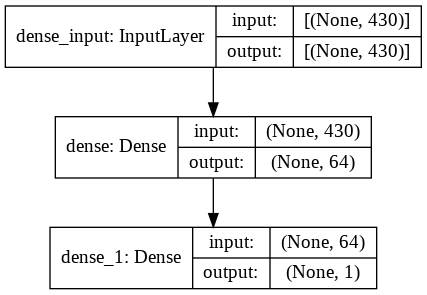

In [19]:
tf.keras.utils.plot_model(model_base, show_shapes=True)

## Predict

In [20]:
y_proba = model_base.predict(X_test)
y_hat = np.where(y_proba > 0.5, 1., 0.)
cm_base = ConfusionMatrix(actual_vector=y_test.values, predict_vector=y_hat.squeeze())

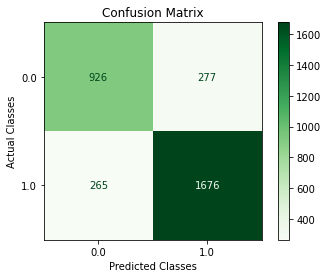

In [21]:
cm_base.plot(cmap=plt.cm.Greens, number_label=True, plot_lib="matplotlib")

In [22]:
print(cm_base)

Predict    0.0        1.0        
Actual
0.0        926        277        

1.0        265        1676       





Overall Statistics : 

95% CI                                                            (0.8144,0.84081)
ACC Macro                                                         0.82761
ARI                                                               0.42729
AUNP                                                              0.81661
AUNU                                                              0.81661
Bangdiwala B                                                      0.70191
Bennett S                                                         0.65522
CBA                                                               0.81395
CSI                                                               0.63444
Chi-Squared                                                       1265.4988
Chi-Squared DF                                                    1
Conditional Entropy                        

# AutoKeras Model

## Preprocessing

In [23]:
X = df.copy()
y = X.pop('activity')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1500)

## Model

In [24]:
reg = ak.StructuredDataClassifier(max_trials=5, overwrite=True)
reg.fit(X_train, y_train, epochs=10)
print(reg.evaluate(X_test, y_test))

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.8327117562294006

Best val_accuracy So Far: 0.8913159370422363
Total elapsed time: 00h 01m 24s
INFO:tensorflow:Oracle triggered exit


2021-10-21 12:04:29,425 - INFO     - Oracle triggered exit


Epoch 1/10
295/295 [==============================] - 1s 2ms/step - loss: 0.5267 - accuracy: 0.7273
Epoch 2/10
295/295 [==============================] - 1s 2ms/step - loss: 0.4117 - accuracy: 0.8164
Epoch 3/10
295/295 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8283
Epoch 4/10
295/295 [==============================] - 1s 2ms/step - loss: 0.3759 - accuracy: 0.8378
Epoch 5/10
295/295 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8459
Epoch 6/10
295/295 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8532
Epoch 7/10
295/295 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8623
Epoch 8/10
295/295 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8715
Epoch 9/10
295/295 [==============================] - 1s 3ms/step - loss: 0.2943 - accuracy: 0.8851
Epoch 10/10
295/295 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.8966

2021-10-21 12:04:54,073 - INFO     - Assets written to: ./structured_data_classifier/best_model/assets


99/99 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.8938
[0.26356714963912964, 0.893765926361084]


## Inspect

In [25]:
model_auto = reg.export_model()

In [26]:
model_auto.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 27)                0         
_________________________________________________________________
normalization (Normalization (None, 27)                55        
_________________________________________________________________
dense (Dense)                (None, 32)                896       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

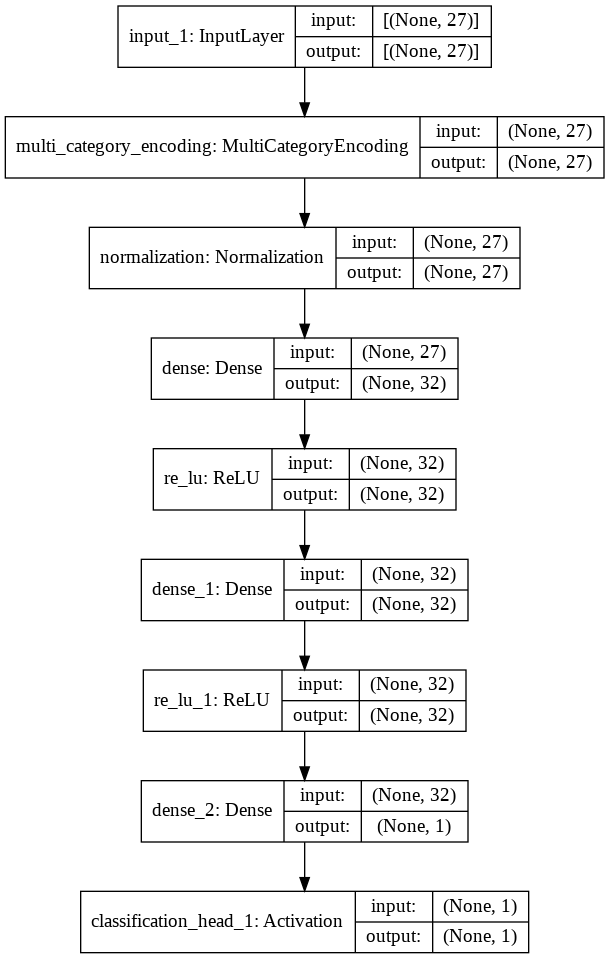

In [27]:
tf.keras.utils.plot_model(model_auto, show_shapes=True)

## Predict

In [28]:
y_hat = reg.predict(X_test)
cm_auto = ConfusionMatrix(actual_vector=y_test.values, predict_vector=y_hat.squeeze()) 

99/99 [==============================] - 0s 2ms/step


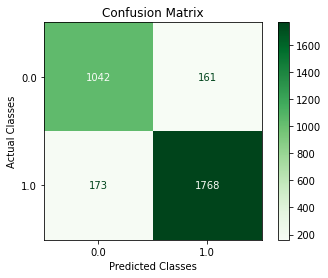

In [29]:
cm_auto.plot(cmap=plt.cm.Greens, number_label=True, plot_lib="matplotlib")

In [31]:
print(cm_auto)

Predict    0.0        1.0        
Actual
0.0        1042       161        

1.0        173        1768       





Overall Statistics : 

95% CI                                                            (0.88299,0.90454)
ACC Macro                                                         0.89377
ARI                                                               0.61902
AUNP                                                              0.88852
AUNU                                                              0.88852
Bangdiwala B                                                      0.80901
Bennett S                                                         0.78753
CBA                                                               0.88424
CSI                                                               0.77559
Chi-Squared                                                       1891.25626
Chi-Squared DF                                                    1
Conditional Entropy                      

# Compare

In [32]:
cp = Compare({'Baseline':cm_base, 'AutoKeras':cm_auto})

In [33]:
cp.print_report()

Best : AutoKeras

Rank  Name         Class-Score   Overall-Score
1     AutoKeras    9.2           5.26667
2     Baseline     7.8           4.48333



## Reporting

{'Message': '/content/report_base.html', 'Status': True}

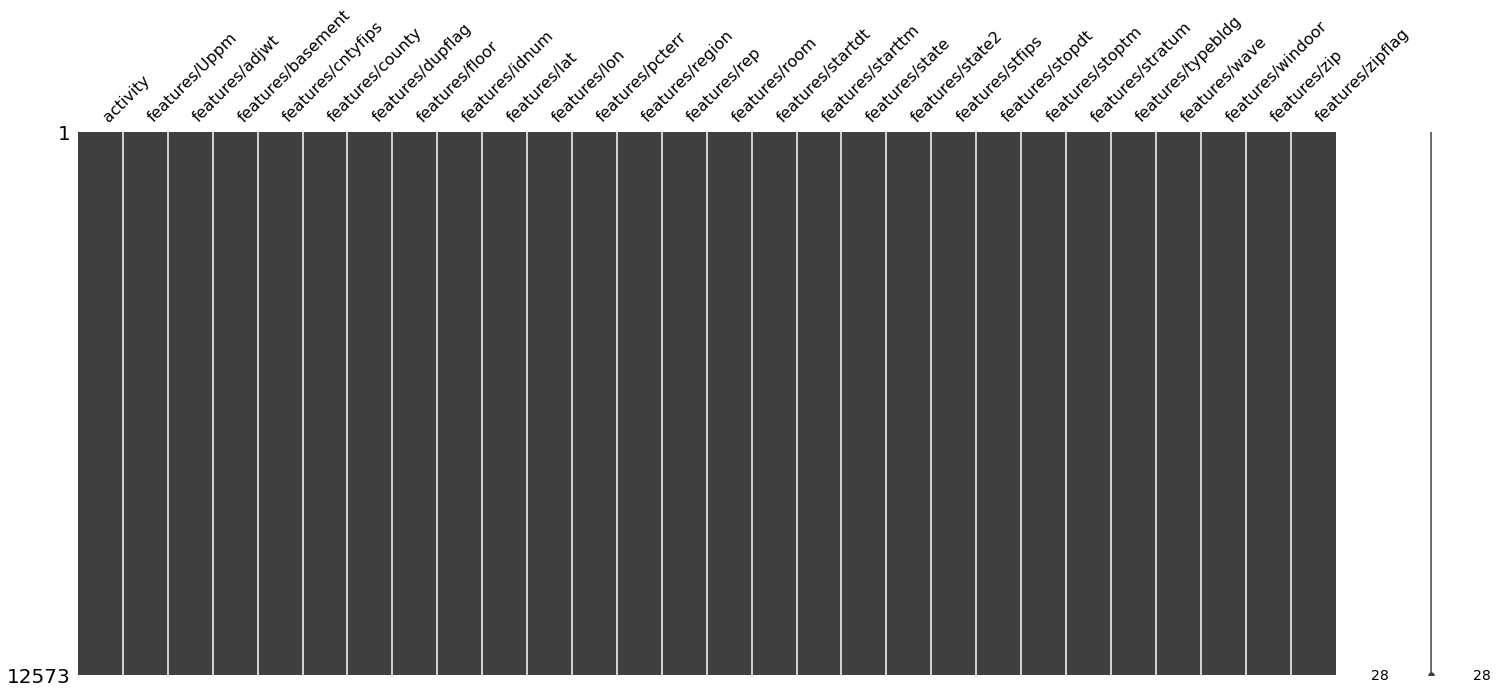

In [36]:
cm_auto.save_html('report_auto')
cm_base.save_html('report_base')